In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import numpy as np

In [3]:
df = pd.read_csv('SleepingChild_out.csv')

In [4]:
df

,Reach,DateTime,elev,width,D50,slope,yield
0,upstream,2002-04-01 00:00,1579.594,0.0,63.669200,-0.012550,0.0
1,upstream,2002-04-01 01:00,1579.594,0.0,63.633882,-0.012546,0.0
2,upstream,2002-04-01 02:00,1579.594,0.0,63.633882,-0.012541,0.0
3,upstream,2002-04-01 03:00,1579.594,0.0,63.633882,-0.012537,0.0
4,upstream,2002-04-01 04:00,1579.594,0.0,63.633882,-0.012533,0.0
...,...,...,...,...,...,...,...
275530,feeder,2020-07-31 18:00,0.000,0.0,0.000000,0.000000,0.0
275531,feeder,2020-07-31 19:00,0.000,0.0,0.000000,0.000000,0.0
275532,feeder,2020-07-31 20:00,0.000,0.0,0.000000,0.000000,0.0
275533,feeder,2020-07-31 21:00,0.000,0.0,0.000000,0.000000,0.0


In [5]:
upstream = df[df['Reach']=='upstream']
df_us = df[df['Reach']=='deposit_upstream']
df_ds = df[df['Reach']=='deposit_downstream']
downstream = df[df['Reach']=='downstream']

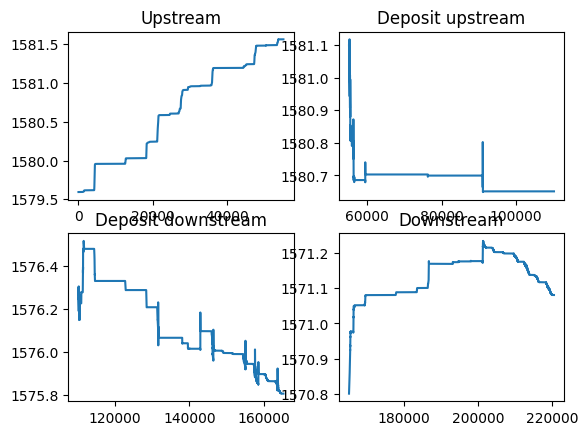

In [6]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['elev'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['elev'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['elev'])
ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['elev'])
ax[1,1].set_title('Downstream')
plt.show()

Text(0.5, 1.0, 'Downstream')

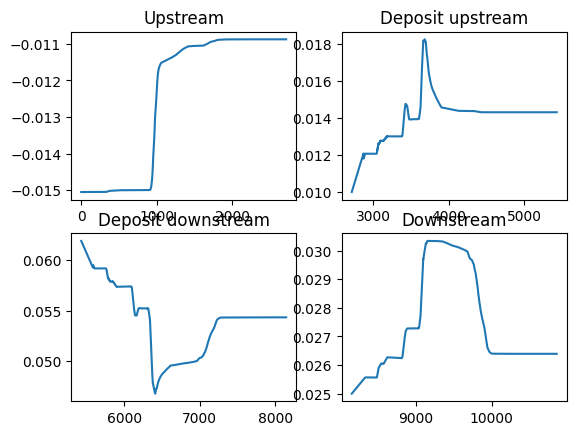

In [97]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['slope'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['slope'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['slope'])
ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['slope'])
ax[1,1].set_title('Downstream')

Text(0.5, 1.0, 'Downstream')

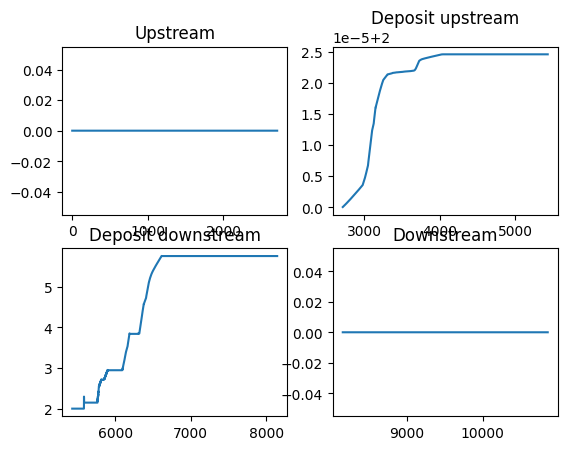

In [98]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['width'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['width'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['width'])
ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['width'])
ax[1,1].set_title('Downstream')

Text(0.5, 1.0, 'Downstream')

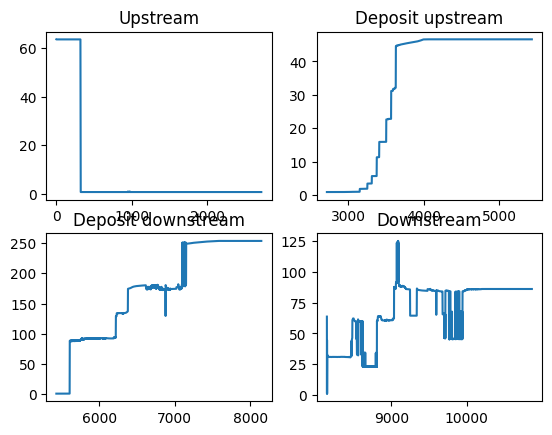

In [99]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['D50'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['D50'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['D50'])

ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['D50'])
ax[1,1].set_title('Downstream')

In [100]:
print(downstream['yield'].sum())

1307683.5784683584


<Axes: >

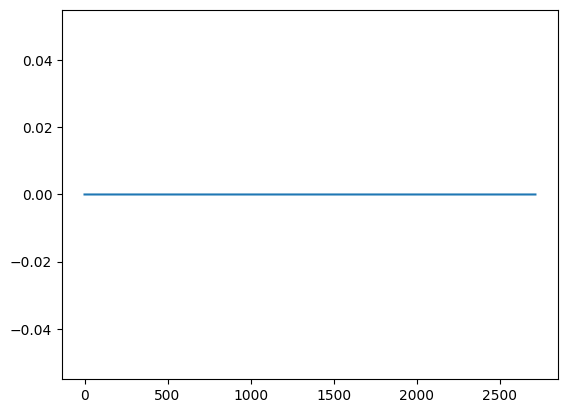

In [10]:
upstream['yield'].plot()

<Axes: >

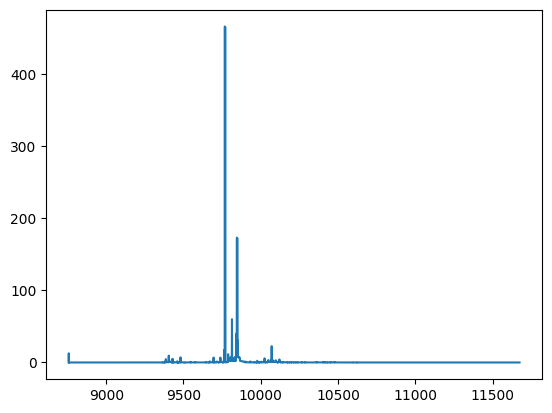

In [37]:
downstream['yield'].plot()

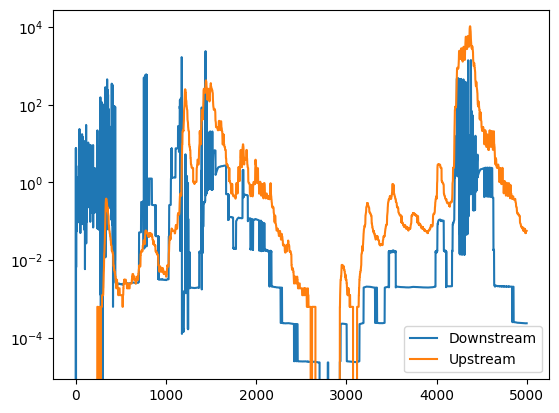

In [13]:
df_f = df[df['Reach'] == 'feeder']
df_f.reset_index(inplace=True)
downstream_r = downstream.reset_index()
fig, ax = plt.subplots()
ax.plot(downstream_r['yield'][:5000], label='Downstream')
ax.plot(df_f['yield'][:5000], label='Upstream')
ax.set_yscale('log')
plt.legend()

In [15]:
start = None
end = None
for i in downstream.index:
    if downstream.loc[i, 'DateTime'] == '2002-04-01 00:00':
        start = i
    if downstream.loc[i, 'DateTime'] == '2002-07-31 22:00':
        end = i
        
print(start, end)

165321 168246


In [16]:
totyield = 0
for i in range(165321, 168247):
    totyield += downstream.loc[i, 'yield']
print(totyield)

921919.1083266385


downstream yield
2012: 914679 kg
2015: 193617
2018: 2195623 
2019: 435761
2020: 1319620 

In [20]:
for i in df_ds.index:
    if df_ds.loc[i, 'DateTime'] == '2021-07-31 00:00':
        print(df_ds.loc[i])

Reach       deposit_downstream
DateTime      2021-07-31 00:00
elev               1744.565202
width                 4.816041
D50                  87.389701
slope                 0.047996
yield                 0.018815
Name: 93487, dtype: object


In [12]:
downstream

,Reach,DateTime,elev,width,D50,slope,yield
165321,downstream,2002-04-01 00:00,1570.800593,0.0,63.669200,0.021000,0.000000
165322,downstream,2002-04-01 01:00,1570.800880,0.0,0.925644,0.021002,7.673123
165323,downstream,2002-04-01 02:00,1570.801181,0.0,45.076699,0.021004,0.000000
165324,downstream,2002-04-01 03:00,1570.801467,0.0,0.891142,0.021006,7.485109
165325,downstream,2002-04-01 04:00,1570.801767,0.0,32.525495,0.021008,0.006545
...,...,...,...,...,...,...,...
220423,downstream,2020-07-31 18:00,1571.080717,0.0,64.283501,0.022936,0.000000
220424,downstream,2020-07-31 19:00,1571.080717,0.0,64.283501,0.022936,0.000000
220425,downstream,2020-07-31 20:00,1571.080717,0.0,64.283501,0.022936,0.000000
220426,downstream,2020-07-31 21:00,1571.080717,0.0,64.283501,0.022936,0.000000


In [8]:
tot = 0
for i in df_f.index:
    if '2002' in str(df_f.loc[i, 'DateTime']):
        tot += df_f.loc[i, 'yield']

In [14]:
tot = 0
for i in downstream.index:
    if '2002' in str(downstream.loc[i, 'DateTime']):
        tot += downstream.loc[i, 'yield']

In [15]:
tot

21753.051618980764